In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt

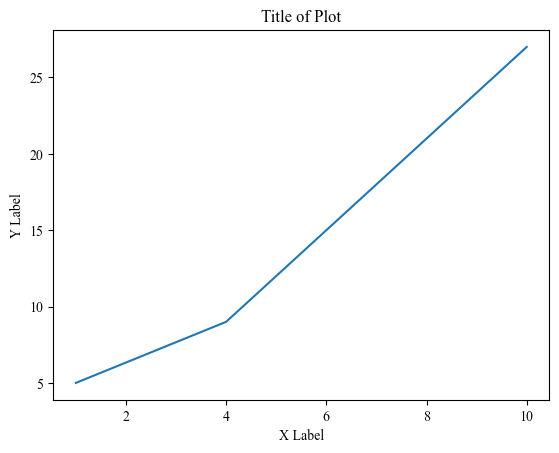

In [6]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

#define x and y
x = [1, 4, 10]
y = [5, 9, 27]

#create line plot
plt.plot (x, y)

#add title and axis labels
plt.title('Title of Plot')
plt.xlabel('X Label')
plt.ylabel('Y Label')

#display plot
plt.show() 

In [3]:
# Ячейка обязательная, если запускать в коллабе, чтобы файле сохранились на диске
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [7]:
ria = pd.read_csv('preprocessed-ria.csv')

In [8]:
ria_timestamps = ria.date.to_list()
ria['result_clean_text'] = ria['result_clean_text'].astype(str)
ria_posts = ria.result_clean_text.to_list()

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="russian", verbose=True)
topics, probs = topic_model.fit_transform(ria_posts)

In [ ]:
topic_model.save("ria_model")

In [4]:
from bertopic import BERTopic
topic_model = BERTopic.load("ria_model")

In [9]:
topics_over_time = topic_model.topics_over_time(ria_posts, ria_timestamps, datetime_format="mixed", nr_bins=20)

20it [01:05,  3.27s/it]


In [10]:
topics_over_time = topic_model.topics_over_time(ria_posts, ria_timestamps,
                                                datetime_format="mixed",
                                                global_tuning=True, evolution_tuning=True, nr_bins=20)

20it [01:03,  3.16s/it]


In [11]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

In [12]:
topic_model.visualize_topics_over_time(topics_over_time, topics=[0, 1, 2, 3, 4, 5])

In [12]:
topics_over_time["Year"] = topics_over_time["Timestamp"].astype(str).str[:4].astype(int)

In [13]:
selected_topics = topics_over_time[topics_over_time['Topic'] > 0]

In [14]:
topic_counts = selected_topics.groupby("Name")["Frequency"].sum()

# Выбор топ-20 тем
top_20_topics = topic_counts.nlargest(20).index

grouped_lenta = selected_topics.groupby(["Year", "Name"])["Frequency"].sum().unstack(fill_value=0)

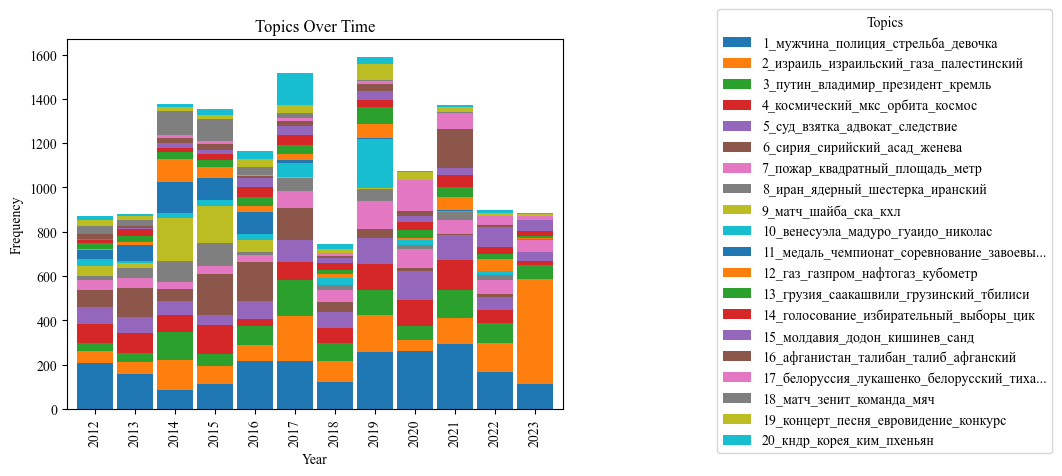

In [15]:
# Фильтрация данных по топ-20 темам
filtered_data = grouped_lenta[top_20_topics]

# Построение графика
filtered_data.plot(kind="bar", stacked=True, width=0.9, align='center')

plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Topics Over Time")
plt.legend(title="Topics", loc="upper right", bbox_to_anchor=(2, 1.1))
plt.savefig("Ria_BERTopic-DTM.eps", format='pdf', dpi=1000,
                    bbox_inches='tight', pad_inches=0)
#plt.show()